# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



# Dataset

In [4]:
data=pd.read_excel('iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Pre-processing

In [6]:
data.shape

(150, 5)

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [17]:
SL_median = data['SL'].median()
SL_median

5.8

In [18]:
data['SL'] = data['SL'].fillna(SL_median)

In [19]:
SW_median = data['SW'].median()
data['SW'] = data['SW'].fillna(SW_median)

In [20]:
PL_median = data['PL'].median()
data['PL'] = data['PL'].fillna(PL_median)

In [21]:
data.isna().sum()
#now no more missing values

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

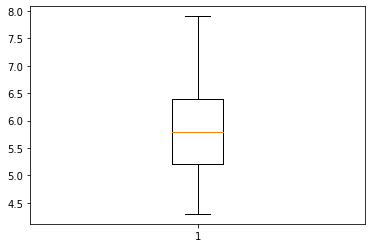

In [22]:
plt.boxplot(data['SL'])
plt.show()

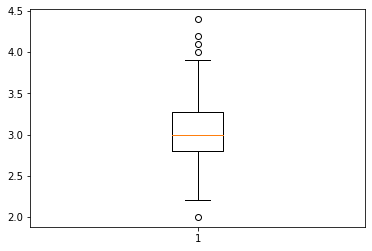

In [23]:
plt.boxplot(data['SW'])
plt.show()

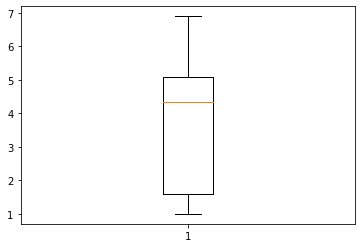

In [24]:
plt.boxplot(data['PL'])
plt.show()

In [25]:
#since data is small we cant eliminate outliers

In [26]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Model creation

In [56]:
#Splitting the dataset

x=data[['SL','SW','PL','PW']]
y=data[['Classification']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)

      SL   SW   PL   PW
82   5.8  2.7  3.9  1.2
110  6.5  3.2  5.1  2.0
134  6.1  2.6  5.6  1.4
29   4.7  3.2  1.6  0.2
70   5.9  3.2  4.8  1.8
..   ...  ...  ...  ...
117  7.7  3.8  6.7  2.2
89   5.5  2.5  4.0  1.3
63   6.1  2.9  4.7  1.4
46   5.1  3.8  1.6  0.2
112  6.8  3.0  5.5  2.1

[120 rows x 4 columns]
      SL   SW   PL   PW
126  6.2  2.8  4.8  1.8
67   5.8  2.7  4.1  1.0
60   5.0  2.0  3.5  1.0
113  5.7  2.5  5.0  2.0
7    5.0  3.4  1.5  0.2
6    4.6  3.4  1.4  0.3
106  5.8  2.5  4.5  1.7
27   5.2  3.0  1.5  0.2
11   4.8  3.4  1.6  0.2
35   5.0  3.2  1.2  0.2
20   5.4  3.4  1.7  0.2
128  6.4  2.8  5.6  2.1
10   5.4  3.0  1.5  0.2
48   5.3  3.7  1.5  0.2
43   5.0  3.0  1.6  0.6
129  7.2  3.0  5.8  1.6
141  5.8  3.1  5.1  2.3
148  6.2  3.4  5.4  2.3
119  6.0  2.2  5.0  1.5
114  5.8  2.8  5.1  2.4
1    4.9  3.0  1.4  0.2
25   5.0  3.0  1.6  0.2
51   5.8  3.2  4.5  1.5
75   6.6  3.0  4.4  1.4
33   5.5  4.2  1.4  0.2
130  7.4  2.8  6.1  1.9
111  6.4  2.7  5.3  1.9
121  5.6  2.8  4

# Logistic Regression (LR)

In [50]:
#Logistic Regression (LR)
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)



C:\Users\Shahma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333

In [51]:
ypred=model1.predict(xtest)
print(ypred)


['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']


In [53]:
cm=confusion_matrix(ypred,ytest)
cm

array([[ 9,  0,  0],
       [ 0, 14,  1],
       [ 0,  1,  5]], dtype=int64)

# KNN classifier

In [73]:
#KNN classifier

model2=KNeighborsClassifier(n_neighbors=7)
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

C:\Users\Shahma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9666666666666667

In [77]:
y_pred=model2.predict(xtest)
print(accuracy_score(ypred,ytest))

0.23333333333333334


# Decision tree classifier

In [59]:
model3=DecisionTreeClassifier()
model3.fit(xtrain,ytrain)
y_pred=model3.predict(xtest)
model3.score(xtest,ytest)

0.9

# Random forest classifier

In [78]:
model4=RandomForestClassifier()
model4.fit(xtrain,ytrain)
y_pred=model4.predict(xtest)
model4.score(xtest,ytest)

C:\Users\Shahma\AppData\Local\Temp\ipykernel_12880\3229337583.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(xtrain,ytrain)


0.9333333333333333

In [80]:
print(accuracy_score(ypred,ytest))

0.23333333333333334


# SVC

In [81]:
model5=SVC()
model5.fit(xtrain,ytrain)
y_pred=model5.predict(xtest)
model5.score(xtest,ytest)

C:\Users\Shahma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8666666666666667

In [82]:
print(accuracy_score(ypred,ytest))

0.23333333333333334


Based on the result KNN classifier is performing better than other algorithms